# Càrrega, neteja i anàlisi de dades

In [31]:
import numpy as np
import pandas as pd
import random
pd.set_option('display.max_columns',None)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

seed_value = 1234

In [32]:
#Carreguem el Train set
train_df = pd.read_csv('C:/Users/Ramon/Documents/TFM/dataset/aps_failure_training_set_processed_8bit.csv', na_values=["NaN"]).sample(frac=1, random_state=seed_value)
train_df.head()

class    aa_000    ab_000    ac_000    ad_000    ae_000    af_000  \
30329 -0.992188 -0.125000  0.992188 -0.468750 -0.007812 -0.046875 -0.054688   
44957 -0.992188 -0.398438  0.242188 -0.468750 -0.007812 -0.046875 -0.054688   
30866 -0.992188 -0.007812 -0.289062 -0.468750 -0.007812 -0.046875 -0.054688   
40447 -0.992188 -0.132812 -0.289062  0.992188 -0.007812 -0.046875 -0.054688   
25580 -0.992188 -0.406250  0.015625 -0.468750 -0.007812 -0.046875 -0.054688   

         ag_000   ag_001    ag_002    ag_003    ag_004    ag_005    ag_006  \
30329 -0.007812 -0.03125 -0.054688 -0.117188 -0.140625 -0.164062  0.765625   
44957 -0.007812 -0.03125 -0.054688 -0.117188 -0.187500 -0.335938 -0.406250   
30866 -0.007812 -0.03125 -0.054688 -0.117188 -0.179688 -0.085938  0.210938   
40447 -0.007812 -0.03125 -0.054688 -0.117188 -0.179688  0.015625 -0.140625   
25580 -0.007812 -0.03125 -0.054688 -0.117188 -0.187500 -0.335938 -0.421875   

         ag_007    ag_008    ag_009    ah_000    ai_000    aj_000    ak_000  \
30329 -0.023438 -0.132812 -0.031250  0.109375 -0.054688 -0.023438 -0.023438   
44957 -0.343750 -0.164062 -0.031250 -0.421875 -0.054688 -0.023438 -0.023438   
30866  0.164062  0.015625 -0.015625 -0.031250 -0.054688 -0.023438 -0.023438   
40447 -0.281250 -0.148438 -0.031250 -0.164062 -0.054688 -0.023438 -0.023438   
25580 -0.351562 -0.164062 -0.031250 -0.429688 -0.054688 -0.023438 -0.023438   

         al_000      am_0    an_000    ao_000    ap_000    aq_000    ar_000  \
30329 -0.109375 -0.109375  0.226562  0.242188 -0.015625 -0.000000 -0.101562   
44957 -0.109375 -0.109375 -0.429688 -0.429688 -0.320312 -0.343750 -0.101562   
30866 -0.109375 -0.109375 -0.000000 -0.031250 -0.015625  0.070312 -0.101562   
40447 -0.109375 -0.109375 -0.171875 -0.164062 -0.132812 -0.171875 -0.101562   
25580 -0.109375 -0.109375 -0.437500 -0.437500 -0.320312 -0.343750 -0.101562   

         as_000    at_000    au_000    av_000    ax_000   ay_000    ay_001  \
30329 -0.007812 -0.039062 -0.015625  0.992188  0.992188 -0.03125 -0.015625   
44957 -0.007812 -0.039062 -0.015625 -0.171875 -0.242188 -0.03125 -0.015625   
30866 -0.007812 -0.039062 -0.015625 -0.039062 -0.078125 -0.03125 -0.015625   
40447 -0.007812 -0.039062 -0.015625  0.195312 -0.023438 -0.03125 -0.015625   
25580 -0.007812 -0.039062 -0.015625 -0.171875 -0.257812 -0.03125 -0.015625   

         ay_002   ay_003   ay_004    ay_005    ay_006    ay_007    ay_008  \
30329 -0.023438 -0.03125 -0.03125 -0.070312 -0.218750 -0.281250  0.992188   
44957 -0.023438 -0.03125 -0.03125 -0.078125 -0.304688 -0.296875 -0.257812   
30866 -0.023438 -0.03125 -0.03125 -0.078125  0.406250 -0.117188 -0.085938   
40447 -0.023438 -0.03125 -0.03125 -0.078125 -0.328125 -0.296875  0.320312   
25580 -0.023438 -0.03125 -0.03125 -0.078125 -0.328125 -0.304688 -0.257812   

         ay_009    az_000    az_001    az_002    az_003    az_004    az_005  \
30329 -0.015625 -0.046875 -0.054688 -0.031250 -0.117188 -0.093750  0.398438   
44957 -0.015625 -0.085938 -0.125000 -0.078125 -0.132812 -0.343750 -0.320312   
30866 -0.015625  0.281250  0.601562  0.273438  0.648438  0.359375 -0.250000   
40447 -0.015625 -0.062500 -0.109375 -0.070312 -0.132812 -0.351562  0.031250   
25580 -0.015625 -0.085938 -0.132812 -0.078125 -0.132812 -0.351562 -0.328125   

         az_006  az_007    az_008    az_009    ba_000    ba_001    ba_002  \
30329 -0.109375 -0.0625 -0.046875 -0.015625  0.625000  0.210938 -0.085938   
44957 -0.109375 -0.0625 -0.046875 -0.015625 -0.351562 -0.367188 -0.335938   
30866 -0.109375 -0.0625 -0.046875 -0.015625  0.062500  0.101562 -0.007812   
40447 -0.109375 -0.0625 -0.046875 -0.015625 -0.226562 -0.234375  0.054688   
25580 -0.109375 -0.0625 -0.046875 -0.015625 -0.367188 -0.375000 -0.343750   

         ba_003    ba_004    ba_005    ba_006    ba_007    ba_008    ba_009  \
30329 -0.171875 -0.234375 -0.281250 -0.273438 -0.273438 -0.140625 -0.109375   
44957 -0.359375 -0.375000 -0.367188 -0.328125 -0.351562 -0.148438 -0.109375   
30866 -0.

In [33]:
#Carreguem el Test set
test_df = pd.read_csv('C:/Users/Ramon/Documents/TFM/dataset/aps_failure_test_set_processed_8bit.csv', na_values=["NaN"]).sample(frac=1, random_state=seed_value)
test_df.head()

class    aa_000    ab_000    ac_000    ad_000    ae_000    af_000  \
10009 -0.992188 -0.203125  0.539062 -0.468750 -0.007812 -0.046875 -0.054688   
15015 -0.992188 -0.390625 -0.031250 -0.468750 -0.007812 -0.046875 -0.054688   
14062 -0.992188 -0.062500 -0.289062  0.992188 -0.007812 -0.046875 -0.054688   
2287   0.992188  0.992188 -0.289062 -0.468750 -0.007812 -0.046875 -0.054688   
9207  -0.992188 -0.187500 -0.289062 -0.468750 -0.007812 -0.046875 -0.054688   

         ag_000    ag_001    ag_002    ag_003    ag_004    ag_005    ag_006  \
10009 -0.007812 -0.031250 -0.054688 -0.117188 -0.179688 -0.250000 -0.070312   
15015 -0.007812 -0.031250 -0.054688 -0.117188 -0.179688 -0.335938 -0.398438   
14062 -0.007812 -0.031250 -0.054688 -0.117188 -0.171875 -0.281250  0.054688   
2287  -0.007812 -0.023438  0.992188  0.992188  0.992188  0.992188  0.906250   
9207  -0.007812 -0.031250 -0.054688 -0.117188 -0.179688 -0.320312 -0.085938   

         ag_007    ag_008    ag_009    ah_000    ai_000    aj_000    ak_000  \
10009  0.007812  0.062500  0.023438 -0.187500 -0.054688 -0.023438 -0.023438   
15015 -0.312500 -0.140625 -0.031250 -0.414062 -0.054688 -0.015625 -0.023438   
14062  0.937500  0.312500 -0.015625 -0.046875 -0.054688 -0.023438 -0.023438   
2287   0.148438  0.007812 -0.023438  0.992188  0.054688 -0.023438 -0.023438   
9207   0.187500  0.125000 -0.015625 -0.203125 -0.054688 -0.023438 -0.023438   

         al_000      am_0    an_000    ao_000    ap_000    aq_000    ar_000  \
10009 -0.109375 -0.109375 -0.187500 -0.187500 -0.179688 -0.187500 -0.101562   
15015 -0.109375 -0.109375 -0.421875 -0.421875 -0.304688 -0.335938 -0.101562   
14062 -0.109375 -0.109375  0.007812  0.007812 -0.109375 -0.046875 -0.101562   
2287   0.867188  0.992188  0.992188  0.992188  0.992188  0.992188  0.992188   
9207  -0.109375 -0.109375 -0.187500 -0.187500 -0.195312 -0.187500 -0.101562   

         as_000    at_000    au_000    av_000    ax_000   ay_000    ay_001  \
10009 -0.007812 -0.023438 -0.015625  0.445312  0.164062 -0.03125 -0.015625   
15015 -0.007812 -0.039062 -0.015625 -0.054688 -0.156250 -0.03125 -0.015625   
14062 -0.007812 -0.039062 -0.015625  0.523438  0.218750 -0.03125 -0.015625   
2287  -0.007812  0.039062 -0.015625  0.992188  0.992188 -0.03125 -0.015625   
9207  -0.007812 -0.039062 -0.015625 -0.031250 -0.109375 -0.03125 -0.015625   

         ay_002   ay_003   ay_004    ay_005    ay_006    ay_007    ay_008  \
10009 -0.023438 -0.03125 -0.03125  0.070312  0.164062 -0.234375 -0.242188   
15015 -0.023438 -0.03125 -0.03125 -0.078125 -0.281250 -0.296875 -0.265625   
14062 -0.023438 -0.03125 -0.03125 -0.070312 -0.234375 -0.257812  0.609375   
2287  -0.023438 -0.03125 -0.03125 -0.023438  0.992188  0.992188 -0.007812   
9207  -0.023438 -0.03125 -0.03125 -0.062500 -0.039062 -0.101562 -0.210938   

         ay_009    az_000    az_001    az_002    az_003    az_004    az_005  \
10009 -0.015625 -0.046875 -0.054688 -0.054688 -0.023438 -0.046875 -0.195312   
15015 -0.015625 -0.101562 -0.125000 -0.070312 -0.125000 -0.328125 -0.320312   
14062 -0.015625 -0.023438 -0.046875 -0.054688 -0.070312  0.328125 -0.156250   
2287  -0.015625  0.710938  0.203125  0.062500 -0.101562 -0.296875  0.992188   
9207  -0.015625 -0.078125 -0.109375 -0.070312 -0.085938  0.070312 -0.265625   

         az_006    az_007    az_008    az_009    ba_000    ba_001    ba_002  \
10009 -0.109375 -0.062500 -0.046875 -0.015625 -0.070312 -0.250000 -0.242188   
15015 -0.109375 -0.062500 -0.046875 -0.015625 -0.343750 -0.351562 -0.335938   
14062 -0.109375 -0.062500 -0.046875 -0.015625  0.023438  0.054688  0.062500   
2287   0.992188  0.992188 -0.046875 -0.015625  0.992188  0.992188  0.992188   
9207  -0.109375 -0.062500 -0.046875 -0.015625 -0.203125 -0.234375 -0.226562   

         ba_003    ba_004    ba_005    ba_006    ba_007    ba_008    ba_009  \
10009 -0.242188 -0.226562 -0.203125 -0.140625  0.187500 -0.125000 -0.109375   
15015 -0.359375 -0.375000 -0.367188 -0.328125 -0.351562 -0.148438 -0.1

In [63]:
print("Dimensions del train set: " + str(test_df.shape))

Dimensions del train set: (16000, 171)


In [34]:
combined_df = pd.concat([train_df, test_df])

In [23]:
null_counts = combined_df.isnull().sum()
columnesAmbNulls = null_counts[null_counts > 0]
print("Columnes amb algún valor nul:")
print(columnesAmbNulls)

Columnes amb algún valor nul:
Series([], dtype: int64)


Com es pot apreciar, el dataset ja ha estat netejat. De fet, no hi ha valors nuls (han estat imputats). 
Per tant, no cal fer res a nivell de neteja.

In [68]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: float64(171)
memory usage: 99.7 MB


Observem que tenim 171 columnes i 76.000 entrades. A nivell de columnes haurem de fer algun tipus de reducció a l'hora d'entrenar els algoritmes.

In [69]:
combined_df.describe()

class        aa_000        ab_000        ac_000        ad_000  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.956286     -0.123457     -0.068506     -0.204456     -0.007744   
std        0.264488      0.368933      0.354247      0.559990      0.003686   
min       -0.992188     -0.406250     -0.289062     -0.468750     -0.007812   
25%       -0.992188     -0.398438     -0.289062     -0.468750     -0.007812   
50%       -0.992188     -0.195312     -0.289062     -0.468750     -0.007812   
75%       -0.992188     -0.070312      0.000000     -0.468750     -0.007812   
max        0.992188      0.992188      0.992188      0.992188      0.992188   

             ae_000        af_000        ag_000        ag_001        ag_002  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.032901     -0.039935     -0.006538     -0.025861     -0.040086   
std        0.108952      0.114069      0.032640      0.067743      0.108607   
min       -0.046875     -0.054688     -0.007812     -0.031250     -0.054688   
25%       -0.046875     -0.054688     -0.007812     -0.031250     -0.054688   
50%       -0.046875     -0.054688     -0.007812     -0.031250     -0.054688   
75%       -0.046875     -0.054688     -0.007812     -0.031250     -0.054688   
max        0.992188      0.992188      0.992188      0.992188      0.992188   

             ag_003        ag_004        ag_005        ag_006        ag_007  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.073948     -0.096590     -0.114123     -0.100090     -0.087194   
std        0.189024      0.257076      0.356217      0.383781      0.360956   
min       -0.117188     -0.187500     -0.335938     -0.421875     -0.351562   
25%       -0.117188     -0.179688     -0.335938     -0.421875     -0.351562   
50%       -0.117188     -0.179688     -0.281250     -0.187500     -0.265625   
75%       -0.117188     -0.164062     -0.054688      0.062500      0.062500   
max        0.992188      0.992188      0.992188      0.992188      0.992188   

             ag_008        ag_009        ah_000        ai_000        aj_000  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.053257     -0.018698     -0.128756     -0.035237     -0.019805   
std        0.217399      0.066004      0.381073      0.114209      0.047797   
min       -0.164062     -0.031250     -0.429688     -0.054688     -0.023438   
25%       -0.164062     -0.031250     -0.421875     -0.054688     -0.023438   
50%       -0.156250     -0.031250     -0.195312     -0.054688     -0.023438   
75%       -0.039062     -0.031250     -0.046875     -0.054688     -0.023438   
max        0.992188      0.992188      0.992188      0.992188      0.992188   

             ak_000        al_000          am_0        an_000        ao_000  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.021407     -0.061695     -0.061888     -0.126925     -0.126813   
std        0.040711      0.192398      0.191147      0.388615      0.387402   
min       -0.023438     -0.109375     -0.109375     -0.437500     -0.437500   
25%       -0.023438     -0.109375     -0.109375     -0.429688     -0.429688   
50%       -0.023438     -0.109375     -0.109375     -0.195312     -0.195312   
75%       -0.023438     -0.109375     -0.109375     -0.039062     -0.046875   
max        0.992188      0.992188      0.992188      0.992188      0.992188   

             ap_000        aq_000        ar_000        as_000        at_000  \
count  76000.000000  76000.000000  76000.000000  76000.000000  76000.000000   
mean      -0.114968     -0.111576     -0.063860     -0.007479     -0.025440   
std        0.315066      0.334439      0.180781      0.017944      0.092934   
min       -0.320312     -0.351562     -0.101562     -0.007812     -0.039062   
25%       -0.312500     -0.343750     -0.101562     -0.0078

In [35]:
#Arrodonim els valors de class a 1 o -1, per evitar valors decimals.
train_df['class'] = train_df['class'].round().replace(-1, 0).replace(-1, 0)
test_df['class'] = test_df['class'].round().replace(-1, 0)
train_df['class'] = train_df['class'].astype(int)
test_df['class'] = test_df['class'].astype(int)

<Axes: ylabel='count'>

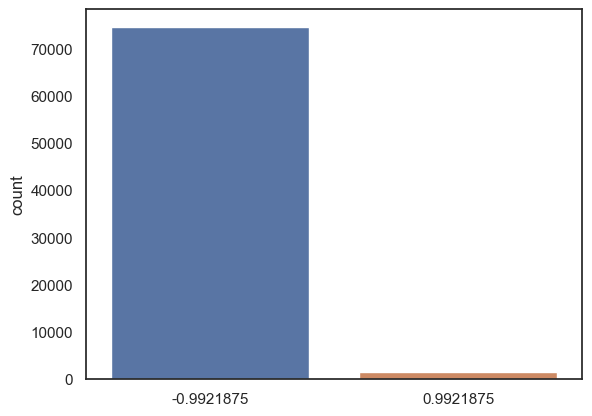

In [71]:
sns.barplot(data=combined_df,x=combined_df['class'].unique(),y=combined_df['class'].value_counts())

In [6]:
pos = combined_df['class'].round().value_counts().get(1, 0)
neg = combined_df['class'].round().replace(-1, 0).value_counts().get(0, 0)
perc = pos/neg*100
print("Núm valors '1':", pos, ", Núm valors '0':", neg, " Perc. positius:", round(perc,2),"%")

Núm valors '1': 1375 , Núm valors '0': 74625  Perc. positius: 1.84 %


El dataset està mot poc balancejat, ja que només el 1.84% dels registres són positius.

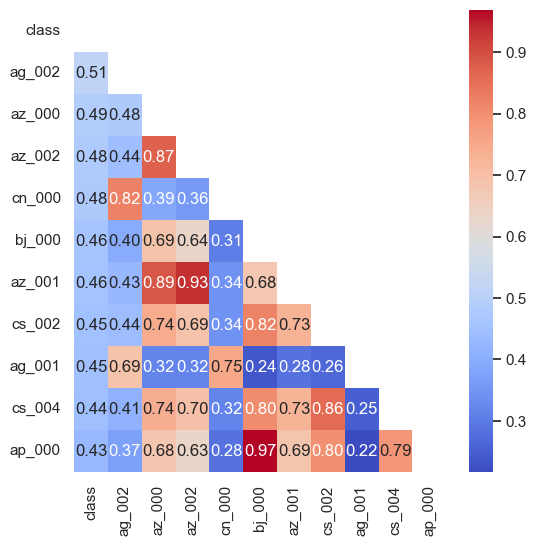

In [36]:
correlation_matrix = combined_df.corr()
class_correlation = correlation_matrix['class']
sorted_correlation = class_correlation.abs().sort_values(ascending=False)
top_correlated_variables = sorted_correlation[0:11].index
top_correlated_variables = top_correlated_variables.tolist()
filtered_correlation_matrix = correlation_matrix.loc[top_correlated_variables, top_correlated_variables]
sns.set(style="white")
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
plt.figure(figsize=(6, 6))
sns.heatmap(filtered_correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Observem que les variables més correlacionades amb la vairable objectiu tenen un nivell de correlació d'entre 0.43 i 0.51 (sent ag_002 la més correlacionada). 

D'altra banda, veiem que algunes variables també estan molt correlacionades entre elles, com (ap_000 i bj_000) o (az_001 i az_002). Això podria indicar que podriem quedar-nos només amb una variable de cada parella.

C:\Users\Ramon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


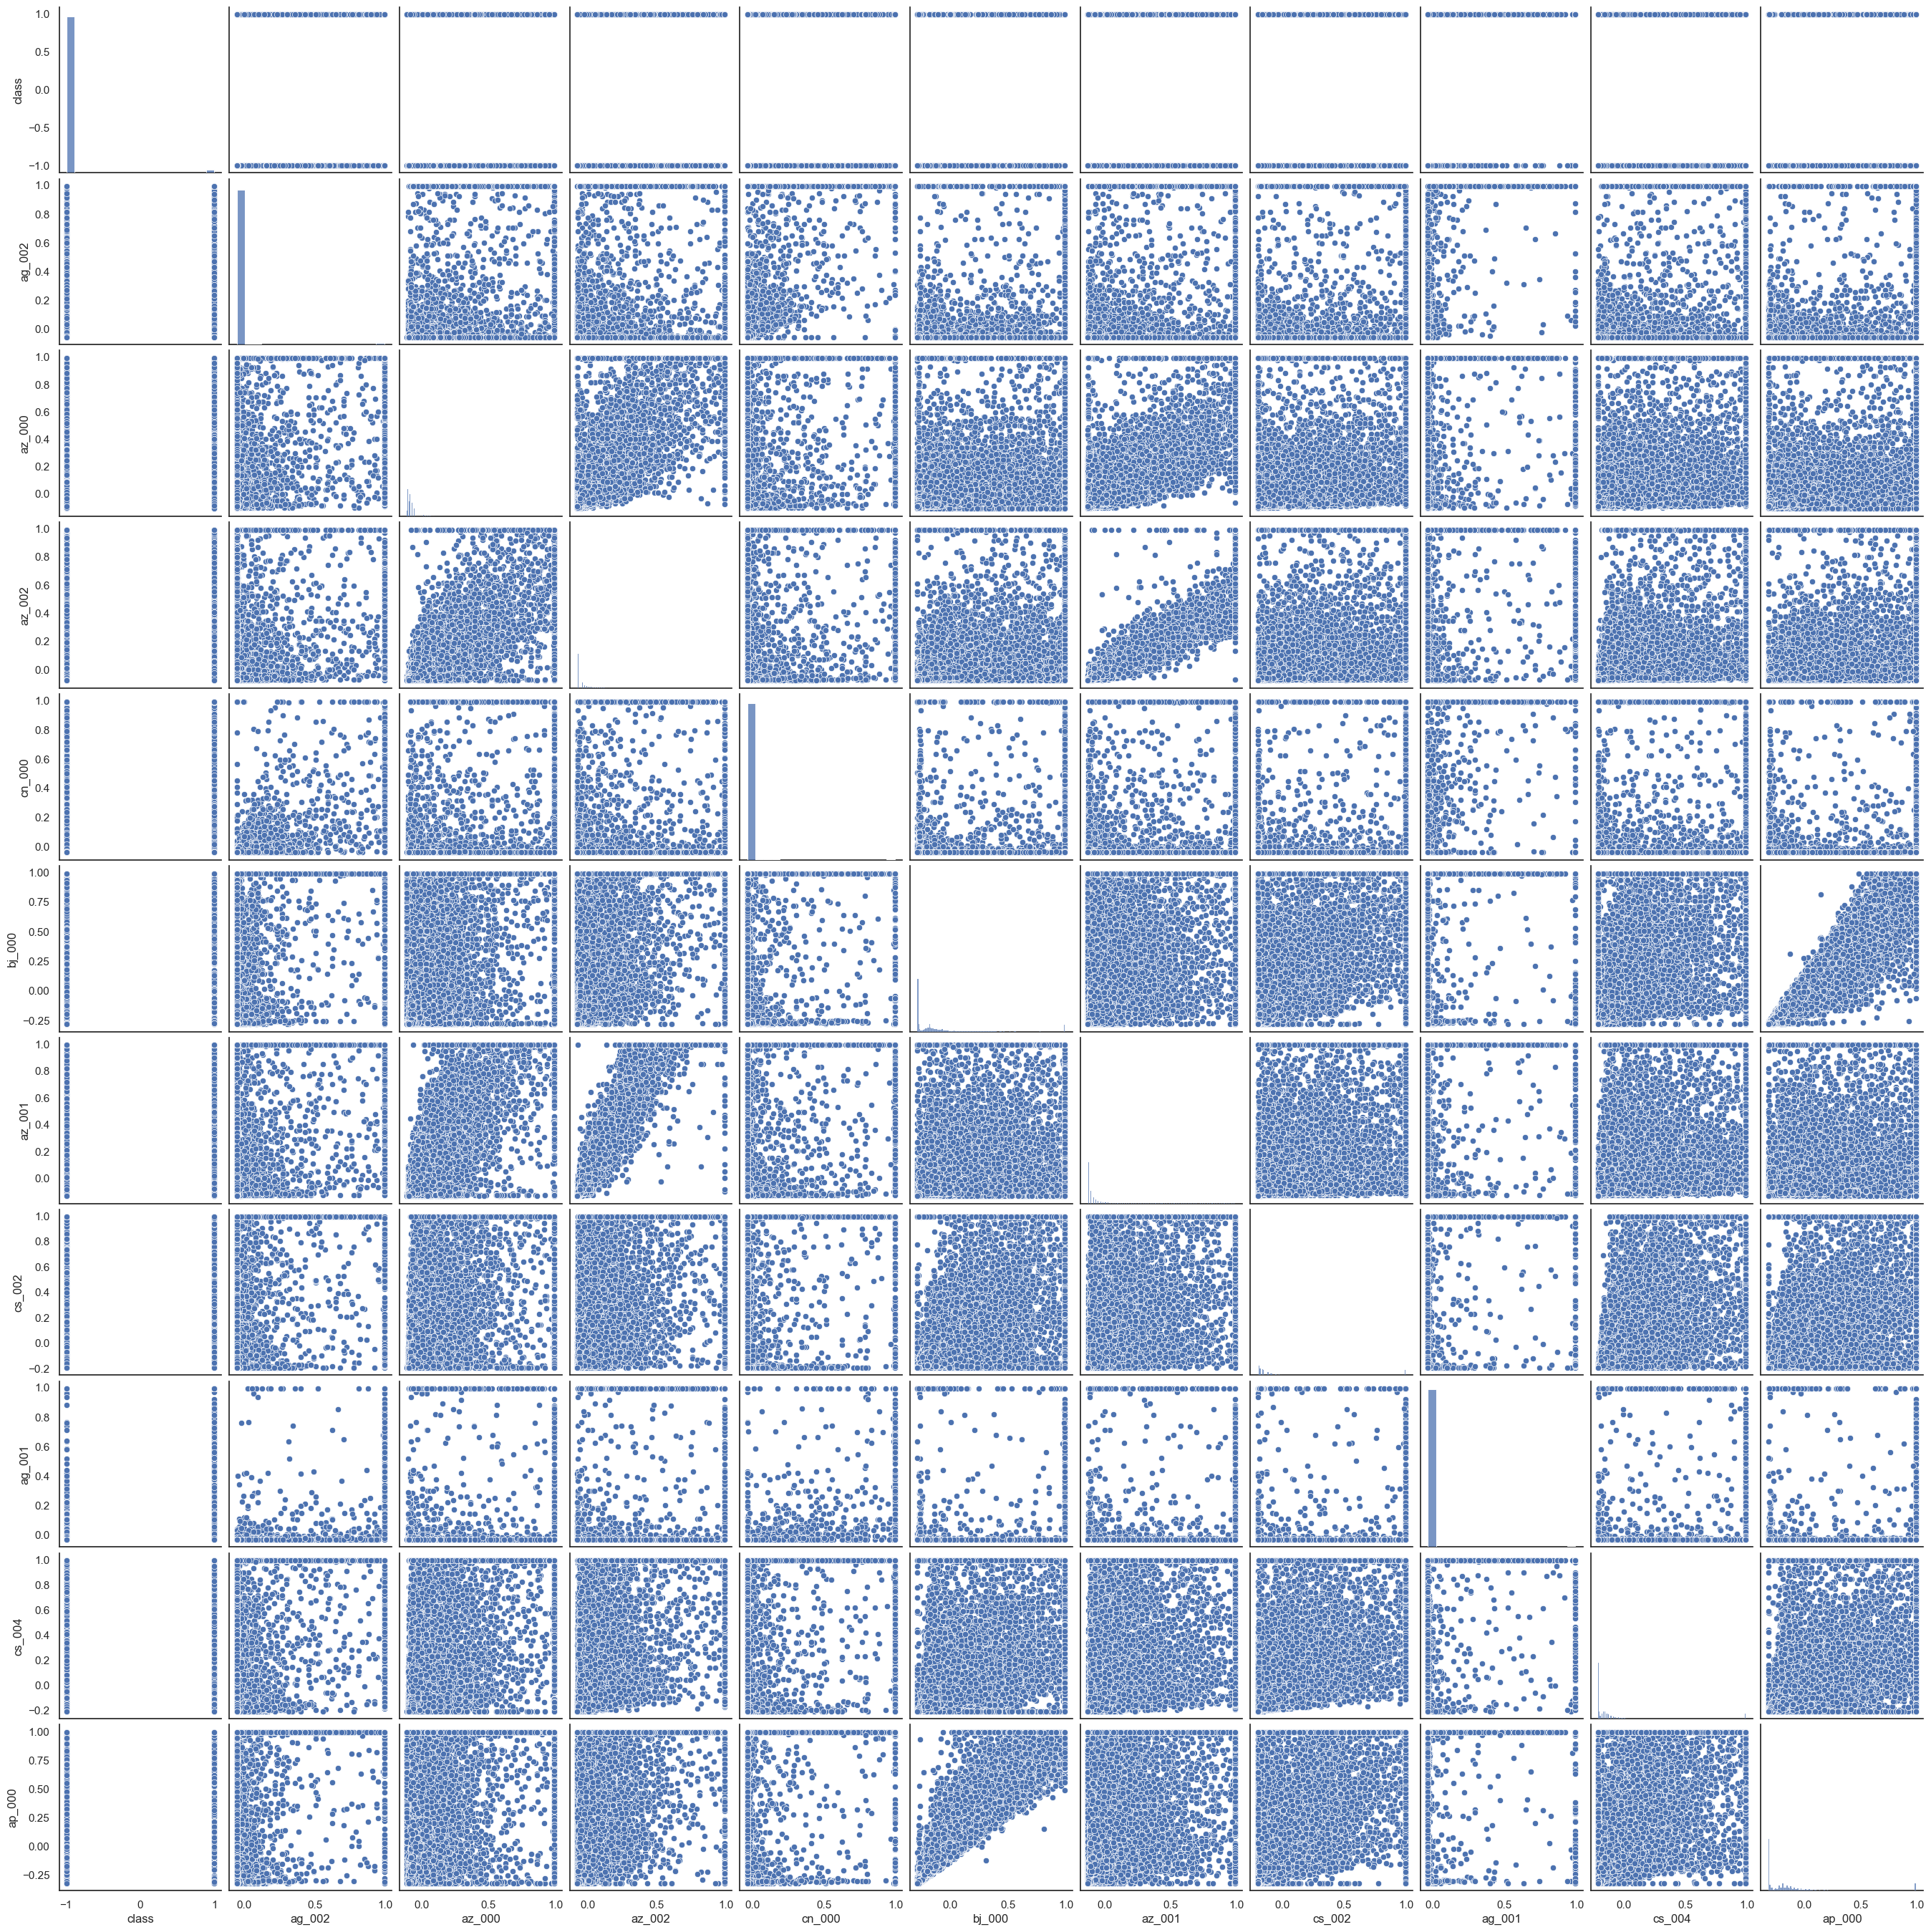

In [24]:
sns.pairplot(combined_df, vars=top_correlated_variables)

Podem observar la correlació entre les diferents classes. Sent les els plots que tenen una forma de "diagonalització" les variables amb més correlació.
Podem observar també que les quatre variables més correlacionades amb la variable objectiu solen estar molt a prop del 0 quan la variable objectiu és negativa i solen estar a prop del 1 quan la variable objectiu és positiva.

In [10]:
rows_p = combined_df[combined_df['class'] >0]
rows_n = combined_df[combined_df['class'] < 0]

In [11]:
abs_p = rows_p['ag_002'].abs()
ave_p = abs_p.mean()
median_p = abs_p.median()
std_p = abs_p.std()

# Display the results
print("Casos positius")
print(f"Average (absolute): {ave_p}")
print(f"Median: {median_p}")
print(f"Standard Deviation: {std_p}\n\n")

abs_n = rows_n['ag_002'].abs()
ave_n = abs_n.mean()
median_n = abs_n.median()
std_n = abs_n.std()

print("Casos negatius")
print(f"Average (absolute): {ave_n}")
print(f"Median: {median_n}")
print(f"Standard Deviation: {std_n}")

Casos positius
Average (absolute): 0.4271193181818182
Median: 0.0546875
Standard Deviation: 0.4413658887175721


Casos negatius
Average (absolute): 0.05892033082077052
Median: 0.0546875
Standard Deviation: 0.0568288713371542


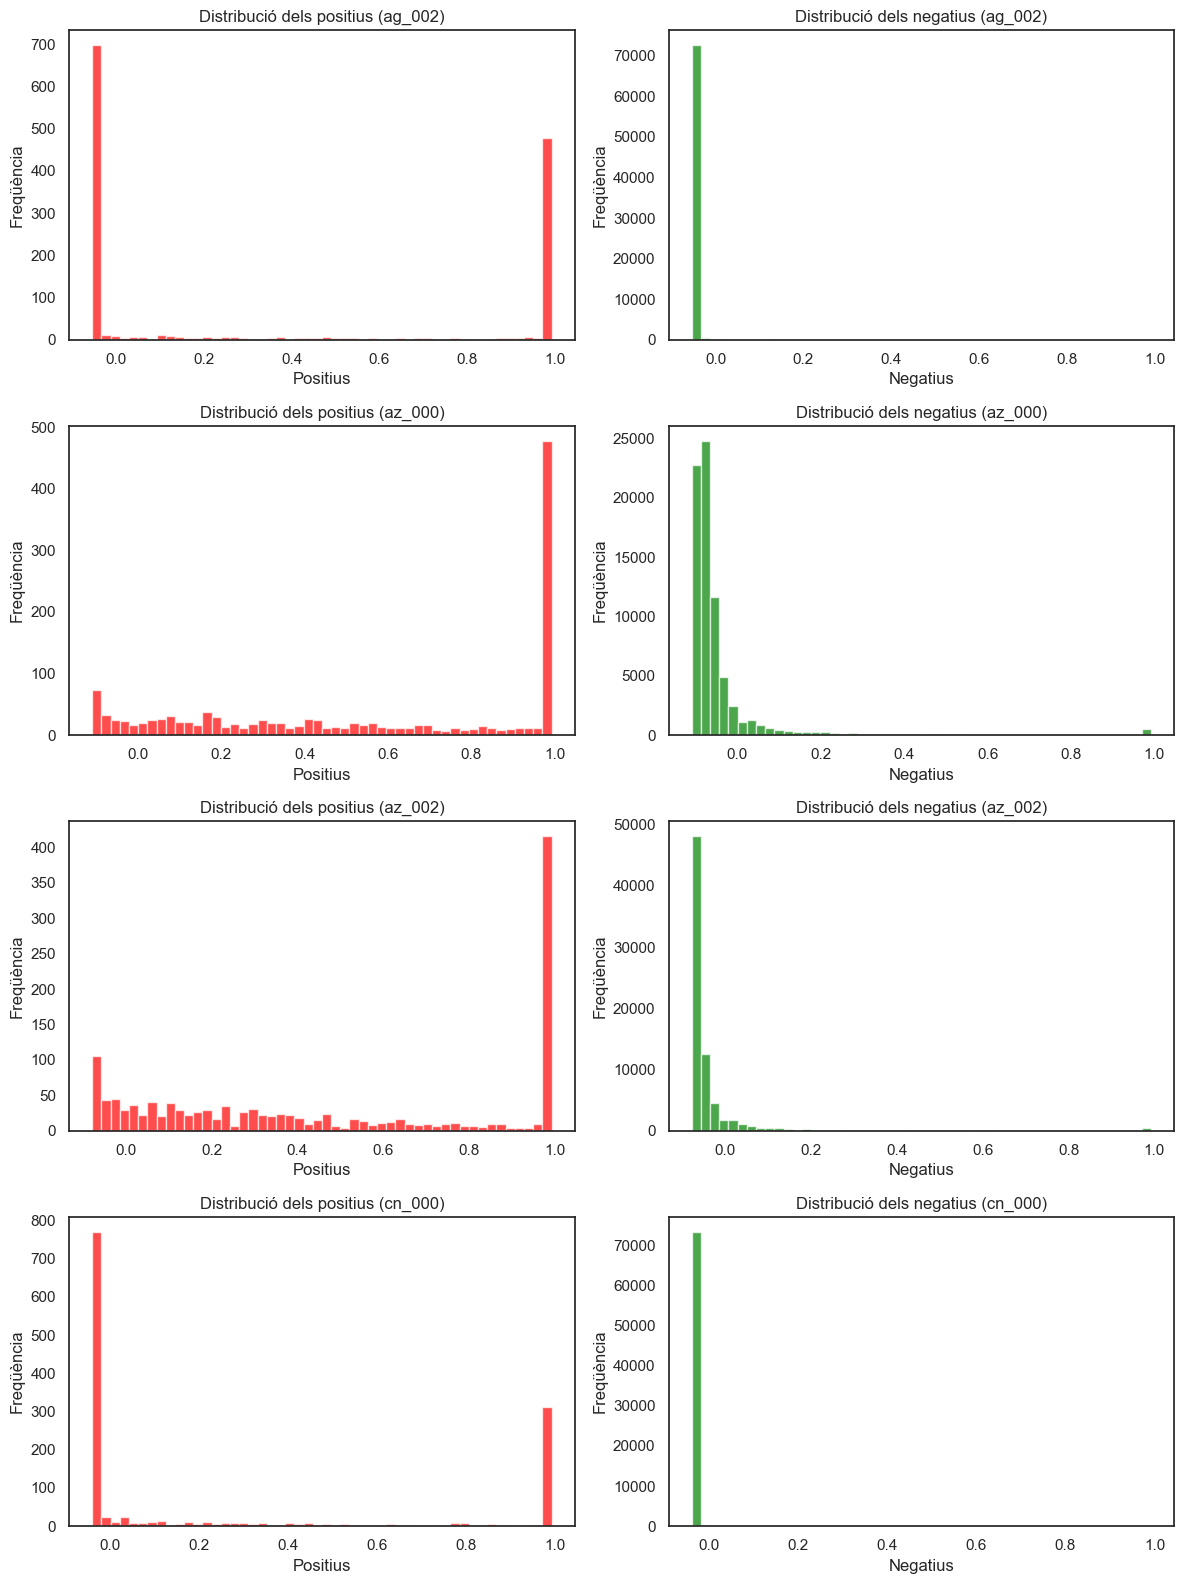

In [131]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

axs[0][0].hist(rows_p['ag_002'], bins=50, color='red', alpha=0.7)
axs[0][0].set_title('Distribució dels positius (ag_002)')
axs[0][0].set_xlabel('Positius')
axs[0][0].set_ylabel('Freqüència')
axs[0][1].hist(rows_n['ag_002'], bins=50, color='green', alpha=0.7)
axs[0][1].set_title('Distribució dels negatius (ag_002)')
axs[0][1].set_xlabel('Negatius')
axs[0][1].set_ylabel('Freqüència')

axs[1][0].hist(rows_p['az_000'], bins=50, color='red', alpha=0.7)
axs[1][0].set_title('Distribució dels positius (az_000)')
axs[1][0].set_xlabel('Positius')
axs[1][0].set_ylabel('Freqüència')
axs[1][1].hist(rows_n['az_000'], bins=50, color='green', alpha=0.7)
axs[1][1].set_title('Distribució dels negatius (az_000)')
axs[1][1].set_xlabel('Negatius')
axs[1][1].set_ylabel('Freqüència')

axs[2][0].hist(rows_p['az_002'], bins=50, color='red', alpha=0.7)
axs[2][0].set_title('Distribució dels positius (az_002)')
axs[2][0].set_xlabel('Positius')
axs[2][0].set_ylabel('Freqüència')
axs[2][1].hist(rows_n['az_002'], bins=50, color='green', alpha=0.7)
axs[2][1].set_title('Distribució dels negatius (az_002)')
axs[2][1].set_xlabel('Negatius')
axs[2][1].set_ylabel('Freqüència')

axs[3][0].hist(rows_p['cn_000'], bins=50, color='red', alpha=0.7)
axs[3][0].set_title('Distribució dels positius (cn_000)')
axs[3][0].set_xlabel('Positius')
axs[3][0].set_ylabel('Freqüència')
axs[3][1].hist(rows_n['cn_000'], bins=50, color='green', alpha=0.7)
axs[3][1].set_title('Distribució dels negatius (cn_000)')
axs[3][1].set_xlabel('Negatius')
axs[3][1].set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

In [37]:
y_train = train_df['class'].copy()
X_train = train_df.drop(['class'],axis=1).copy()
y_test = test_df['class'].copy()
X_test = test_df.drop(['class'],axis=1).copy()

In [38]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [10]:
# Utilitzem RandomUnderSampler amb la finalitat de reduir el número de mostres de la classe majoritària
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=seed_value)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Utilitzem SMOTE amb la finalitat d'augmentar el número de mostres de la classe minoritària
#smote = SMOTE(sampling_strategy='auto', random_state=seed_value)
#X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
ros = RandomOverSampler(sampling_strategy='auto', random_state=seed_value)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

In [39]:
rus = RandomUnderSampler(sampling_strategy=0.2, random_state=seed_value)
X_res, y_res = rus.fit_resample(X, y)

# Utilitzem SMOTE amb la finalitat d'augmentar el número de mostres de la classe minoritària
#smote = SMOTE(sampling_strategy='auto', random_state=seed_value)
#X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
ros = RandomOverSampler(sampling_strategy='auto', random_state=seed_value)
X_res, y_res = ros.fit_resample(X_res, y_res)

In [77]:
print("Nombre de mostres positives:", sum(y_resampled == 1))
print("Nombre de mostres negatives:", sum(y_resampled == 0))

Nombre de mostres positives: 5000
Nombre de mostres negatives: 5000


In [40]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, precision_score, accuracy_score
#Funció per calcular la matriu de confusió, la precisió, el recall i el F1
def calcularQualitatResultats(y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    confusion_mat_inverted = confusion_mat[::-1, ::-1]
    print(confusion_mat_inverted)
    
    precision = precision_score(y_test, y_pred)
    print(f'Precision: {round(precision, 3)}')
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {round(accuracy, 3)}')

    recall = recall_score(y_test, y_pred)
    print(f'Recall: {round(recall, 3)}')
    
    f1 = f1_score(y_test, y_pred, labels=[1], average='micro')
    print(f'F1: {round(f1, 3)}')

In [41]:
from sklearn.model_selection import cross_val_score

def calcularValidacioCreuada(model, x, y):
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='recall')
    print("Scores de validació creuada (recall):", cv_scores)
    print("Mitjana dels scores (recall):", cv_scores.mean())
    cv_scores = cross_val_score(model, x, y, cv=5, scoring='f1')
    print("Scores de validació creuada (f1):", cv_scores)
    print("Mitjana dels scores (f1):", cv_scores.mean())

In [42]:
top_correlated_variables = top_correlated_variables[1:11]

# Model de classificació per predir si el sistema fallarà o no

## Arbres de classificació

### Random Forest Classifier

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=seed_value), param_grid, cv=5)
grid_search.fit(X[top_correlated_variables], y)
print("Millors paràmetres trobats a través de Grid Search:")
print(grid_search.best_params_)

Millors paràmetres trobats a través de Grid Search:
{'max_depth': 20, 'n_estimators': 100}


In [18]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=seed_value), param_grid, cv=5)
grid_search.fit(X_res[top_correlated_variables], y_res)
print("Millors paràmetres trobats a través de Grid Search:")
print(grid_search.best_params_)

Millors paràmetres trobats a través de Grid Search:
{'max_depth': None, 'n_estimators': 100}


In [43]:
# Entrenem amb les variables més correlacionades
model_rfc = RandomForestClassifier(random_state=seed_value,class_weight={0: 0.98, 1: 0.02})
#model_rfc.fit(X_train[top_correlated_variables], y_train)
#y_pred = model_rfc.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred)

In [44]:
calcularValidacioCreuada(model_rfc, X[top_correlated_variables], y)

Scores de validació creuada (recall): [0.49454545 0.46545455 0.42545455 0.49818182 0.52      ]
Mitjana dels scores (recall): 0.4807272727272728
Scores de validació creuada (f1): [0.60176991 0.5577342  0.54418605 0.59956236 0.62582057]
Mitjana dels scores (f1): 0.5858146189950766


In [45]:
#Entrenem amb max_depth=20
model_rfc = RandomForestClassifier(random_state=seed_value,class_weight={0: 0.98, 1: 0.02}, max_depth=20)
#model_rfc.fit(X_train[top_correlated_variables], y_train)
#y_pred = model_rfc.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc, X[top_correlated_variables], y)

Scores de validació creuada (recall): [0.42909091 0.37090909 0.35636364 0.39636364 0.45818182]
Mitjana dels scores (recall): 0.40218181818181814
Scores de validació creuada (f1): [0.55924171 0.49514563 0.49122807 0.52403846 0.59294118]
Mitjana dels scores (f1): 0.5325190090827173


#### Entrenem amb les variables més correlacionades amb SAMPLING

In [46]:
model_rfc_resampling = RandomForestClassifier(random_state=seed_value)
#model_rfc_resampling.fit(X_resampled[top_correlated_variables], y_resampled)
#y_pred = model_rfc_resampling.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc_resampling, X_res[top_correlated_variables], y_res)

Scores de validació creuada (recall): [0.99418182 0.99781818 0.99272727 0.99636364 0.99563636]
Mitjana dels scores (recall): 0.9953454545454546
Scores de validació creuada (f1): [0.98098314 0.98175313 0.97360913 0.97997139 0.982771  ]
Mitjana dels scores (f1): 0.9798175563872986


Podem observar una clara superioritat quan entrenem el model amb resampling.

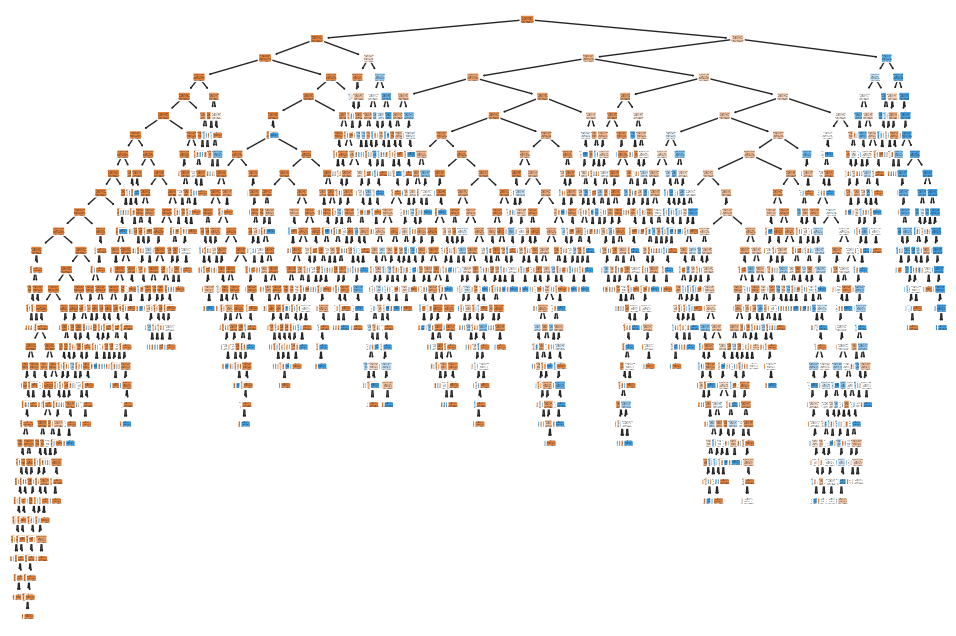

In [47]:
#Mostrem un simple arbre de decisió per obtenir una mostra visual
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model_dt = DecisionTreeClassifier(random_state=seed_value)
model_dt.fit(X[top_correlated_variables], y)

plt.figure(figsize=(12, 8))
plot_tree(model_dt, filled=True, feature_names=top_correlated_variables, class_names=["Negatiu", "Positiu"], rounded=True)
plt.show()

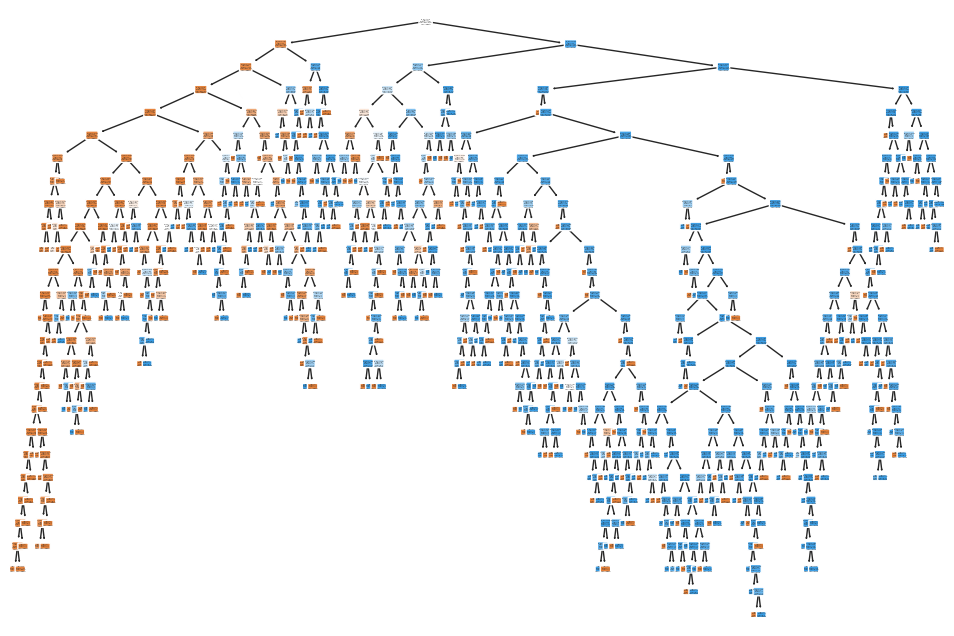

In [48]:
#Mostrem un simple arbre de decisió per obtenir una mostra visual amb SAMPLING
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

model_dt_resampling = DecisionTreeClassifier(random_state=seed_value)
model_dt_resampling.fit(X_res[top_correlated_variables], y_res)

plt.figure(figsize=(12, 8))
plot_tree(model_dt_resampling, filled=True, feature_names=top_correlated_variables, class_names=["Negatiu", "Positiu"], rounded=True)
plt.show()

Fins i tot, al fer una representació gràfica del model, observem que amb resampling obtenim un model més clar en el que només amb la primera condició ja podriem encertar amb bastant bona fiabilitat la classe objectiu.

In [49]:
#Entrenem amb les variables més importants trobades durant l'entrenament
tmp = RandomForestClassifier(random_state=seed_value)
tmp.fit(X, y)

feature_importance = tmp.feature_importances_
feature_ranking = sorted(zip(feature_importance, X_train.columns), reverse=True)

for importance, feature in feature_ranking[:20]:
    print(f'{feature}: {importance}')

aq_000: 0.03859702646103143
ag_002: 0.038109633323867007
ag_001: 0.03681617357229708
ap_000: 0.03152896997784845
bj_000: 0.026646179157282082
dn_000: 0.026132009097502244
cn_000: 0.023751866925356125
ck_000: 0.02020124709693456
bh_000: 0.019129322753020418
ay_005: 0.017189392835597176
ai_000: 0.015381877476428978
az_002: 0.014815515057561863
ay_006: 0.013731624733032657
az_000: 0.013580614631730034
bk_000: 0.013115031158206412
az_001: 0.012420981375734797
aa_000: 0.012033814175385696
cs_002: 0.012033651116092997
am_0: 0.011548522552351361
bb_000: 0.010681172815911157


In [50]:
#Entrenem amb les variables més importants trobades durant l'entrenament
tmp = RandomForestClassifier(random_state=seed_value)
tmp.fit(X_res, y_res)

feature_importance_sampling = tmp.feature_importances_
feature_ranking_sampling = sorted(zip(feature_importance_sampling, X_resampled.columns), reverse=True)

for importance, feature in feature_ranking_sampling[:20]:
    print(f'{feature}: {importance}')

ap_000: 0.08458694779793273
dn_000: 0.07467220850740514
bt_000: 0.06503089099465721
aa_000: 0.060021924069825074
bb_000: 0.04808749844273397
ci_000: 0.04334849542532763
ck_000: 0.043266593945758026
bv_000: 0.03658317213071928
bj_000: 0.03526801400239967
bh_000: 0.0344362316041101
ah_000: 0.03219006177139122
bu_000: 0.03215038108719533
aq_000: 0.02490782481520959
bx_000: 0.022013141177277748
bi_000: 0.021951071384568796
az_000: 0.017016968591169076
bg_000: 0.015944205105030827
ba_002: 0.01557171127840761
cs_002: 0.014912900287000392
cq_000: 0.011393214548399217


In [51]:
top_10_features = [feature for importance, feature in feature_ranking[:10]]

In [52]:
top_10_features_sampling = [feature for importance, feature in feature_ranking_sampling[:10]]

C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


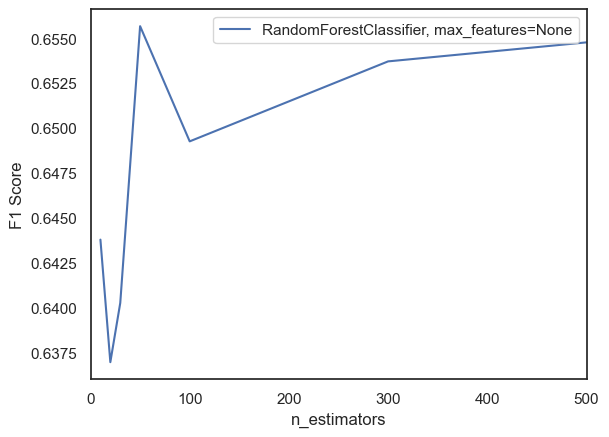

In [62]:
#Cerquem quin és el nombre òptim d'estimadors
from sklearn.metrics import f1_score
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
estimators = [10,20,30,50,100,300,500]
f1_scores = {}

for label, clf in ensemble_clfs:
    f1_scores[label] = []
    for i in estimators:
        clf.set_params(n_estimators=i)
        clf.fit(X_train[top_10_features], y_train)  # Train on your training data, not X_test
        y_pred = clf.predict(X_test[top_10_features])
        f1 = f1_score(y_test, y_pred, labels=[1], average='micro')  # You can choose 'micro' or 'macro' depending on your needs
        f1_scores[label].append((i, f1))

for label, clf_err in f1_scores.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(0, 500)
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.legend(loc="upper right")
plt.show()

Observem que a partir de 50 podria ser un nombre força òptim d'estimadors. Tenint en compte que al no especificar els estimadors agafa 100 estimadors per defecte, ja ens trobariem en el punt òptim i no cal especificar-li.

In [53]:
model_rfc2 = RandomForestClassifier(random_state=seed_value, class_weight={0: 0.98, 1: 0.02})
#model_rfc2.fit(X_train[top_10_features], y_train)
#y_pred = model_rfc2.predict(X_test[top_10_features])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc2, X[top_10_features], y)

Scores de validació creuada (recall): [0.41090909 0.41090909 0.39636364 0.44       0.43272727]
Mitjana dels scores (recall): 0.41818181818181815
Scores de validació creuada (f1): [0.5368171  0.53809524 0.52278177 0.56018519 0.55868545]
Mitjana dels scores (f1): 0.5433129492015831


In [54]:
model_rfc2_resampling = RandomForestClassifier(random_state=seed_value)
#model_rfc2_resampling.fit(X_resampled[top_10_features_sampling], y_resampled)
#y_pred = model_rfc2_resampling.predict(X_test[top_10_features_sampling])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc2_resampling, X_res[top_10_features_sampling], y_res)

Scores de validació creuada (recall): [0.99490909 0.99854545 0.99781818 0.99636364 0.99781818]
Mitjana dels scores (recall): 0.997090909090909
Scores de validació creuada (f1): [0.98134864 0.97896613 0.97512438 0.97787295 0.98175313]
Mitjana dels scores (f1): 0.9790130451034489


In [55]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=seed_value)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_pca = pca.fit_transform(X)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=seed_value)
X_resampled_pca = pca.fit_transform(X_resampled)
X_res_pca = pca.fit_transform(X_res)

In [57]:
model_rfc3 = RandomForestClassifier(random_state=seed_value)
#model_rfc3.fit(X_train_pca, y_train)
#y_pred = model_rfc3.predict(X_test_pca)
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc3, X_pca, y)

Scores de validació creuada (recall): [0.33090909 0.31636364 0.31272727 0.34909091 0.42181818]
Mitjana dels scores (recall): 0.3461818181818182
Scores de validació creuada (f1): [0.45614035 0.45430809 0.43877551 0.47058824 0.50877193]
Mitjana dels scores (f1): 0.4657168240389463


In [59]:
#Entrenem amb PCA i SAMPLING
model_rfc3_resampling = RandomForestClassifier(random_state=seed_value)
#model_rfc3_resampling.fit(X_resampled_pca[:10000], y_resampled)
#y_pred = model_rfc3_resampling.predict(X_test_pca)
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_rfc3_resampling, X_res_pca, y_res)

Scores de validació creuada (recall): [0.99854545 1.         1.         1.         1.        ]
Mitjana dels scores (recall): 0.9997090909090909
Scores de validació creuada (f1): [0.97896613 0.97621583 0.97552324 0.97795164 0.98039216]
Mitjana dels scores (f1): 0.9778097984504148


En els casos que utilitzem PCA veiem que la qualitat del model acaba sent una mica inferior a la qualitat obtinguda utilitzant les 10 característiques més importants.

## XGBoost Classifier

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

xgb_classifier = XGBClassifier(n_estimators=100, objective="binary:logistic", seed=seed_value)
#y_pred_prob = model.predict(dtest)
#y_pred = [1 if prob >= 0.15 else 0 for prob in y_pred_prob]
calcularValidacioCreuada(xgb_classifier, X, y)

Scores de validació creuada (recall): [0.69454545 0.69090909 0.78909091 0.76727273 0.77454545]
Mitjana dels scores (recall): 0.7432727272727273
Scores de validació creuada (f1): [0.77800407 0.77393075 0.8460039  0.82101167 0.80834915]
Mitjana dels scores (f1): 0.8054599089562393


In [62]:
xgb_classifier = XGBClassifier(n_estimators=100, objective="binary:logistic", seed=seed_value)
#y_pred_prob = model.predict(dtest)
#y_pred = [1 if prob >= 0.15 else 0 for prob in y_pred_prob]
calcularValidacioCreuada(xgb_classifier, X_res, y_res)

Scores de validació creuada (recall): [0.99709091 1.         1.         1.         1.        ]
Mitjana dels scores (recall): 0.9994181818181819
Scores de validació creuada (f1): [0.98597627 0.98743268 0.98284489 0.98920863 0.99170573]
Mitjana dels scores (f1): 0.9874336397473786


## Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
#model_nb.fit(X_train[top_correlated_variables], y_train)
#y_pred_nb = model_nb.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred_nb)
calcularValidacioCreuada(model_nb, X[top_correlated_variables], y)

Scores de validació creuada (recall): [0.85454545 0.82909091 0.88727273 0.84727273 0.89818182]
Mitjana dels scores (recall): 0.8632727272727273
Scores de validació creuada (f1): [0.38461538 0.39790576 0.42324371 0.40985048 0.44107143]
Mitjana dels scores (f1): 0.4113373536267472


In [64]:
model_nb_resampling = GaussianNB()
model_nb_resampling.fit(X_resampled, y_resampled)
#y_pred_nb = model_nb_resampling.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred_nb)
calcularValidacioCreuada(model_nb_resampling, X_res, y_res)

Scores de validació creuada (recall): [0.94254545 0.96363636 0.93527273 0.94181818 0.93890909]
Mitjana dels scores (recall): 0.9444363636363636
Scores de validació creuada (f1): [0.93270961 0.93905032 0.92484718 0.92998205 0.93618564]
Mitjana dels scores (f1): 0.9325549584835452


Amb Naive Bayes no hem obtingut tan bons resultats com anteriorment. Cal destacar, que sense resampling obtenim un f1 molt baix, malgrat que el recall és alt. Això és perquè hi ha hagut molts falsos positius i, per tant, una baixa precisió.

## Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

model_lr = LogisticRegression()
#model_lr.fit(X_train, y_train)
#y_pred = model_lr.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_lr, X[top_correlated_variables], y)

Scores de validació creuada (recall): [0.34909091 0.29454545 0.31636364 0.31272727 0.33818182]
Mitjana dels scores (recall): 0.3221818181818182
Scores de validació creuada (f1): [0.45933014 0.41968912 0.44615385 0.45263158 0.47328244]
Mitjana dels scores (f1): 0.4502174261121922


In [66]:
model_lr_resampling = LogisticRegression()
#model_lr_resampling.fit(X_resampled[top_correlated_variables], y_resampled)
#y_pred = model_lr_resampling.predict(X_test[top_correlated_variables])
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(model_lr_resampling, X_res[top_correlated_variables], y_res)

Scores de validació creuada (recall): [0.93527273 0.94909091 0.92654545 0.93309091 0.936     ]
Mitjana dels scores (recall): 0.9360000000000002
Scores de validació creuada (f1): [0.94385321 0.94496741 0.93230882 0.94130594 0.94424065]
Mitjana dels scores (f1): 0.9413352064964761


## Support Vector Classifier

In [69]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.metrics")
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [319]:
# Primer obtindrem només quins són els millors hiperparàmetres per entrenar el SVC

svm = SVC(random_state=seed_value)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # Només per al nucli polinòmic
    'gamma': ['scale', 'auto', 0.1, 1]  # Només per als nuclis rbf, poly, i sigmoid
}

scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

print("GridSearchCV")
grid_search = GridSearchCV(svm, param_grid, scoring=scoring, refit='f1', cv=5)
print("fit")
grid_search.fit(X_train[top_correlated_variables][:3000], y_train[:3000]) # utilitzem només 3000 registres perquè no tardi massa
best_svm_model = grid_search.best_estimator_
print("Millors hiperparàmetres:")
print(grid_search.best_params_)

GridSearchCV
fit
Millors hiperparàmetres:
{'C': 1, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}


In [70]:
svm_model = SVC(C=1, degree=4, gamma=1, kernel='poly', random_state=seed_value)
#svm_model.fit(X_train, y_train)
#y_pred = svm_model.predict(X_test)
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(svm_model, X[top_correlated_variables], y)

Scores de validació creuada (recall): [0.36363636 0.30909091 0.30909091 0.28363636 0.36727273]
Mitjana dels scores (recall): 0.3265454545454545
Scores de validació creuada (f1): [0.50505051 0.44270833 0.45092838 0.42276423 0.51530612]
Mitjana dels scores (f1): 0.4673515140875918


In [71]:
svm_model_resampling = SVC(C=1, degree=4, gamma=1, kernel='poly', random_state=seed_value)
#svm_model.fit(X_resampled, y_resampled)
#y_pred = svm_model.predict(X_test)
#calcularQualitatResultats(y_test, y_pred)
calcularValidacioCreuada(svm_model_resampling, X_res[top_correlated_variables], y_res)

Scores de validació creuada (recall): [0.93163636 0.94327273 0.91781818 0.936      0.928     ]
Mitjana dels scores (recall): 0.9313454545454546
Scores de validació creuada (f1): [0.94888889 0.94809942 0.93377728 0.94493392 0.94518519]
Mitjana dels scores (f1): 0.9441769388964607


## Xarxa neuronal

In [18]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras import backend as K

def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    precision = K.sum(y_true * y_pred) / (K.sum(y_pred) + K.epsilon())
    recall = K.sum(y_true * y_pred) / (K.sum(y_true) + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(), f1_metric])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Evaluate the quality of the results using your function
calcularQualitatResultats(y_test, y_pred)



Epoch 1/20


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - recall: 0.5150 - f1_metric: 0.2146 - val_loss: 0.0302 - val_recall: 0.5627 - val_f1_metric: 0.3247
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0244 - recall: 0.6520 - f1_metric: 0.2748 - val_loss: 0.0273 - val_recall: 0.6773 - val_f1_metric: 0.3852
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0220 - recall: 0.6830 - f1_metric: 0.2824 - val_loss: 0.0275 - val_recall: 0.6347 - val_f1_metric: 0.3625
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0208 - recall: 0.6910 - f1_metric: 0.2863 - val_loss: 0.0285 - val_recall: 0.6160 - val_f1_metric: 0.3456
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0195 - recall: 0.7160 - f1_metric: 0.2965 - val_loss: 0.0280 - val_recall: 0.5947 - val_f1_metric: 0.3383
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 

In [92]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras import backend as K

def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    precision = K.sum(y_true * y_pred) / (K.sum(y_pred) + K.epsilon())
    recall = K.sum(y_true * y_pred) / (K.sum(y_true) + K.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(), f1_metric])

# Train the model
model.fit(X_resampled, y_resampled, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Evaluate the quality of the results using your function
calcularQualitatResultats(y_test, y_pred)




Epoch 1/20


313/313 [==============================] - 2s 4ms/step - loss: 0.1734 - recall: 0.9580 - f1_metric: 0.9442 - val_loss: 0.1179 - val_recall: 0.9733 - val_f1_metric: 0.3632
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.1059 - recall: 0.9754 - f1_metric: 0.9674 - val_loss: 0.1317 - val_recall: 0.9840 - val_f1_metric: 0.3772
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0904 - recall: 0.9800 - f1_metric: 0.9736 - val_loss: 0.1152 - val_recall: 0.9787 - val_f1_metric: 0.3921
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - recall: 0.9818 - f1_metric: 0.9780 - val_loss: 0.0979 - val_recall: 0.9653 - val_f1_metric: 0.4058
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0668 - recall: 0.9848 - f1_metric: 0.9807 - val_loss: 0.1165 - val_recall: 0.9680 - val_f1_metric: 0.3923
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.0604 - re

# Model de detecció d'anomalies

## Primer anàlisi de possibles anomalies

### K-Means

C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.340885971110426
Davies–Bouldin Index: 0.9948450984993457


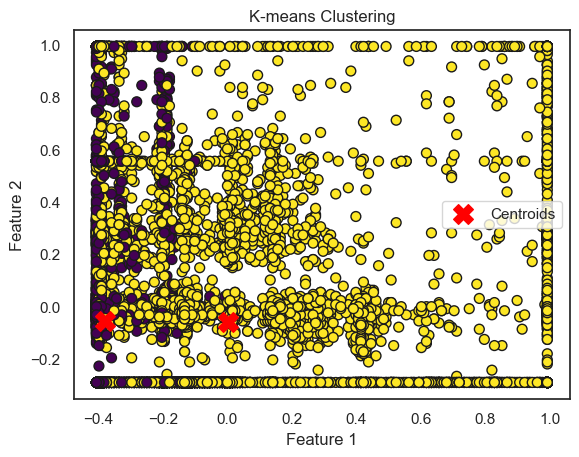

In [179]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
n_clusters = 2
X_test_array = X_test.values
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_test_array)

cluster_labels = kmeans.labels_

silhouette_avg = silhouette_score(X_test_array, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

db_index = davies_bouldin_score(X_test_array, cluster_labels)
print(f"Davies–Bouldin Index: {db_index}")

plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [180]:
from sklearn.metrics import adjusted_rand_score,normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

ari_score = adjusted_rand_score(y_test, cluster_labels)
print(f"Adjusted Rand Index: {ari_score}")
nmi_score = normalized_mutual_info_score(y_test, cluster_labels)
print(f"Normalized Mutual Information: {nmi_score}")
homogeneity = homogeneity_score(y_test, cluster_labels)
completeness = completeness_score(y_test, cluster_labels)
v_measure = v_measure_score(y_test, cluster_labels)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")
print(f"V-measure: {v_measure}")

Adjusted Rand Index: -0.022208038473670887
Normalized Mutual Information: 0.023753658721748883
Homogeneity: 0.07881608863354447
Completeness: 0.01398409910362346
V-measure: 0.023753658721748887


Els resultats són dolents.
ARI: Un valor negatiu indica que les agrupacions són aleatòries.
NMI: Al tenir un valor proper a 0 significa que el clustering i el ground truth són independents.
Homogeneity: Un valor proper a 0 indica que els clústers no són homogenis
Completeness: Al tenir un valor baix inidca que el clustering no ha pogut capturar completament les agruipacions originals.
V-measure: És la mitjana harmònica entre Homogeneity i Completeness. Al tenir un valor baix indica un pobre rendiment.

### DBSCAN

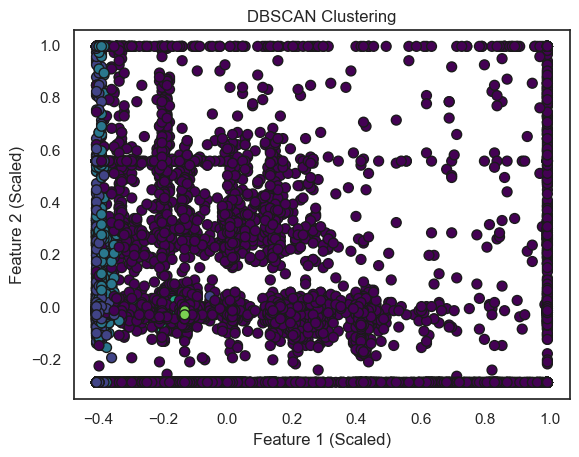

In [181]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dbscan_model = DBSCAN(eps=0.85, min_samples=30)  # You can adjust eps and min_samples
dbscan_model.fit(X_train)
predictions_dbscan = dbscan_model.fit_predict(X_test)
X_test_array = X_test.values

plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=predictions_dbscan, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

In [184]:
from sklearn.metrics import calinski_harabasz_score
silhouette_avg = silhouette_score(X_test, predictions_dbscan)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin = davies_bouldin_score(X_test, predictions_dbscan)
print(f"Davies-Bouldin Index: {davies_bouldin}")
calinski_harabasz = calinski_harabasz_score(X_test, predictions_dbscan)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
unique_clusters, cluster_counts = np.unique(predictions_dbscan, return_counts=True)
cluster_density = dict(zip(unique_clusters, cluster_counts))
print("Cluster Density:", cluster_density)

Silhouette Score: 0.008660676244886333
Davies-Bouldin Index: 1.6874120150000287
Calinski-Harabasz Index: 1885.685098754403
Cluster Density: {-1: 9856, 0: 4277, 1: 1655, 2: 131, 3: 50, 4: 31}


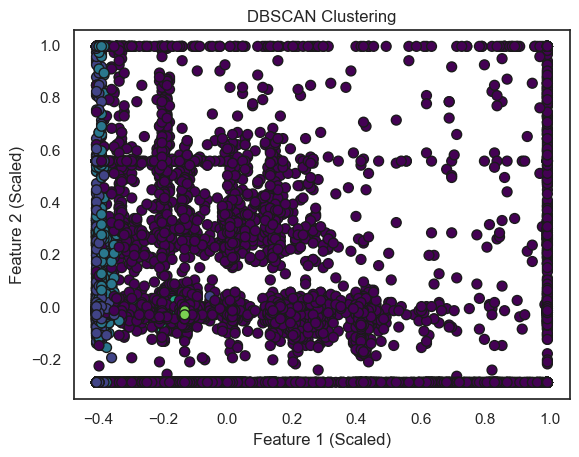

In [94]:
dbscan_model = DBSCAN(eps=0.85, min_samples=30)  # You can adjust eps and min_samples
dbscan_model.fit(X_resampled)
predictions_dbscan = dbscan_model.fit_predict(X_test)
X_test_array = X_test.values

plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=predictions_dbscan, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

In [95]:
from sklearn.metrics import calinski_harabasz_score
silhouette_avg = silhouette_score(X_test, predictions_dbscan)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin = davies_bouldin_score(X_test, predictions_dbscan)
print(f"Davies-Bouldin Index: {davies_bouldin}")
calinski_harabasz = calinski_harabasz_score(X_test, predictions_dbscan)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
unique_clusters, cluster_counts = np.unique(predictions_dbscan, return_counts=True)
cluster_density = dict(zip(unique_clusters, cluster_counts))
print("Cluster Density:", cluster_density)

Silhouette Score: 0.008660676244886333
Davies-Bouldin Index: 1.6874120150000287
Calinski-Harabasz Index: 1885.685098754403
Cluster Density: {-1: 9856, 0: 4277, 1: 1655, 2: 131, 3: 50, 4: 31}


Silhouette Score: Aquesta puntuació indica quina és la cohesió i separació dels clústers. Tenint en compte que el rang és (-1,1), un valor proper a 0 el podriem considerar feble.
Davies-Bouldin Index: Indica la comparsitat i l'espessor dels clústers. Un valor alt indicaria que els clústers són dolents.
Calinski-Harabasz: També indica la cohesió i la separació dels clústers. En aquest cas, el valor és força alt i, per tant, positiu.
Cluster Density: Indica el nombre de punts per clúster.

## Models predictius

## Isolation Forest

In [72]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
model_if = IsolationForest(contamination=0.04, random_state=seed_value)
#model_if.fit(X_train)
#predictions = model_if.predict(X_test)
#print("Predictions:", predictions)
#print(".............")
#predictions = np.where(predictions == -1, 0, predictions)
#predictions = 1-predictions
#calcularQualitatResultats(y_test, predictions)
predictions = np.where(y == 0, -1, y)
calcularValidacioCreuada(model_if, X[top_correlated_variables], predictions)

Scores de validació creuada (recall): [0.22957198 0.29482072 0.27272727 0.30078125 0.23184358]
Mitjana dels scores (recall): 0.2659489599427078
Scores de validació creuada (f1): [0.00796598 0.00994691 0.00926672 0.01035225 0.01114468]
Mitjana dels scores (f1): 0.009735305180520277


In [73]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
model_if_resampling = IsolationForest(contamination=0.04, random_state=seed_value)
model_if_resampling.fit(X_resampled)

#predictions = model_if_resampling.predict(X_test)
#print("Predictions:", predictions)
#print(".............")
#predictions = np.where(predictions == -1, 0, predictions)
#predictions = 1-predictions
#calcularQualitatResultats(y_test, predictions)
predictions = np.where(y_res == 0, -1, y_res)
calcularValidacioCreuada(model_if_resampling, X_res[top_correlated_variables], predictions)

Scores de validació creuada (recall): [0.         0.         0.93236364 0.89345455 0.89345455]
Mitjana dels scores (recall): 0.5438545454545455
Scores de validació creuada (f1): [0.         0.         0.63686041 0.94372959 0.94372959]
Mitjana dels scores (f1): 0.5048639193809472


Graduant el paràmetre "contamination" podem trobar un punt en el que tenim un bon recall i F1.

## Local Outlier Factor

In [351]:
from sklearn.neighbors import LocalOutlierFactor
lof_model = LocalOutlierFactor(contamination='auto',novelty=True) 
#lof_model.fit(X_train)
#predictions_lof = lof_model.fit_predict(X_test)
#predictions_lof_mapped = np.where(predictions_lof == -1, 0, 1)

#print("LOF Predictions:", predictions_lof_mapped)
#calcularQualitatResultats(y_test, predictions_lof_mapped)
predictions_train_mapped = np.where(y_train == 0, -1, 1)
calcularValidacioCreuada(lof_model, X_train[top_correlated_variables], predictions_train_mapped)

C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Scores de validació creuada (recall): [0.84649123 0.8372093  0.82474227 0.89673913 0.82681564]
Mitjana dels scores (recall): 0.8463995142659755


C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Scores de validació creuada (f1): [0.0330791  0.03089864 0.02751032 0.02821236 0.0253794 ]
Mitjana dels scores (f1): 0.02901596344898318


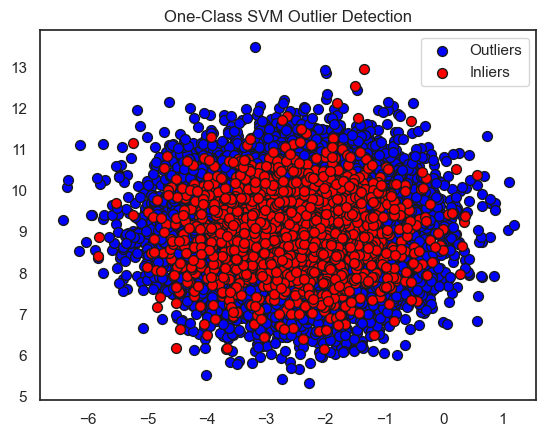

In [353]:
lof_model = LocalOutlierFactor(contamination='auto') 
lof_model.fit(X_train)
predictions_lof = lof_model.fit_predict(X_test)
predictions_lof_mapped = np.where(predictions_lof == -1, 0, 1)

X, _ = make_blobs(n_samples=16000, centers=1, random_state=42)
plt.scatter(X[predictions_lof_mapped == 1, 0], X[predictions_lof_mapped == 1, 1], c='blue', label='Outliers', edgecolors='k', s=50)
plt.scatter(X[predictions_lof_mapped == 0, 0], X[predictions_lof_mapped == 0, 1], c='red', label='Inliers', edgecolors='k', s=50)
plt.title("One-Class SVM Outlier Detection")
plt.legend()
plt.show()

In [355]:
from sklearn.neighbors import LocalOutlierFactor
lof_model_resampling = LocalOutlierFactor(contamination='auto', novelty=True) 
#lof_model_resampling.fit(X_resampled)
#predictions_lof_resampling = lof_model_resampling.fit_predict(X_test)
#predictions_lof_mapped_resampling = np.where(predictions_lof_resampling == -1, 0, 1)
#print("LOF Predictions:", predictions_lof_mapped_resampling)
#calcularQualitatResultats(y_test, predictions_lof_mapped_resampling)
predictions_train_mapped = np.where(y_resampled == 0, -1, 1)
calcularValidacioCreuada(lof_model_resampling, X_resampled[top_correlated_variables], predictions_train_mapped)

C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Scores de validació creuada (recall): [0.     0.     0.88   0.8605 0.889 ]
Mitjana dels scores (recall): 0.5259


C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Scores de validació creuada (f1): [0.         0.         0.63791229 0.92502016 0.94123875]
Mitjana dels scores (f1): 0.5008342387188665


C:\Users\Ramon\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Veiem que independentment del valor de "contamination" sempre obtenim molt bon recall i molt mal F1. Això és perquè estem detectan molts falsos negatius. I si provem d'utilitzar només les variables més correlacionades o amb PCA obtenim resultats igual de dolents.

## One-class SVM

In [74]:
from sklearn.svm import OneClassSVM
svm_model = OneClassSVM(nu=0.5)  # Adjust the nu parameter based on your dataset
#svm_model.fit(X_train)

#predictions_svm = svm_model.predict(X_test)
#predictions_svm_mapped = np.where(predictions_svm == -1, 0, 1)

#print("One-Class SVM Predictions:", predictions_svm_mapped)
#calcularQualitatResultats(y_test, predictions_svm_mapped)
predictions_train_mapped = np.where(y == 0, -1, 1)
calcularValidacioCreuada(svm_model, X[top_correlated_variables], predictions_train_mapped)

Scores de validació creuada (recall): [0.0077821  0.01992032 0.01185771 0.01171875 0.        ]
Mitjana dels scores (recall): 0.01025577548045924
Scores de validació creuada (f1): [0.0005176  0.00126534 0.00079418 0.0007486  0.        ]
Mitjana dels scores (f1): 0.0006651426085821843


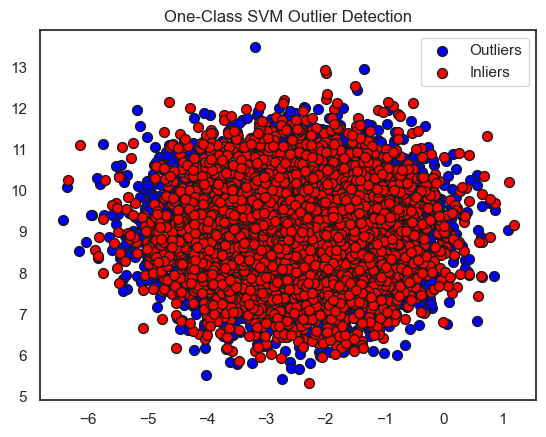

In [360]:
svm_model_tmp = OneClassSVM(nu=0.5)  # Adjust the nu parameter based on your dataset
svm_model_tmp.fit(X_train)

predictions_svm = svm_model_tmp.predict(X_test)
predictions_svm_mapped = np.where(predictions_svm == -1, 0, 1)

X, _ = make_blobs(n_samples=16000, centers=1, random_state=42)
plt.scatter(X[predictions_svm_mapped == 1, 0], X[predictions_svm_mapped == 1, 1], c='blue', label='Outliers', edgecolors='k', s=50)
plt.scatter(X[predictions_svm_mapped == 0, 0], X[predictions_svm_mapped == 0, 1], c='red', label='Inliers', edgecolors='k', s=50)
plt.title("One-Class SVM Outlier Detection")
plt.legend()
plt.show()

In [76]:
from sklearn.svm import OneClassSVM
svm_model = OneClassSVM(nu=0.5)  # Adjust the nu parameter based on your dataset
#svm_model.fit(X_resampled)
#predictions_svm = svm_model.pred
ict(X_test)
#predictions_svm_mapped = np.where(predictions_svm == -1, 0, 1)
#print("One-Class SVM Predictions:", predictions_svm_mapped)
#calcularQualitatResultats(y_test, predictions_svm_mapped)
predictions_train_mapped = np.where(y_res == 0, -1, 1)
calcularValidacioCreuada(svm_model, X_res[top_correlated_variables], predictions_train_mapped)

Scores de validació creuada (recall): [0.         0.         0.28290909 0.11745455 0.12472727]
Mitjana dels scores (recall): 0.10501818181818182
Scores de validació creuada (f1): [0.         0.         0.28106936 0.21021803 0.22179114]
Mitjana dels scores (f1): 0.14261570668686158


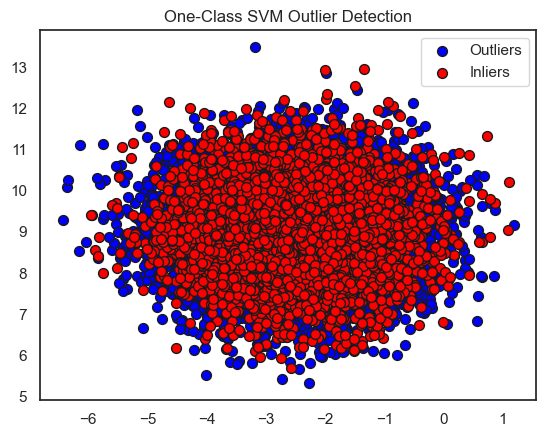

In [362]:
svm_model_resampling_tmp = OneClassSVM(nu=0.5)  # Adjust the nu parameter based on your dataset
svm_model_resampling_tmp.fit(X_resampled)
predictions_svm = svm_model_resampling_tmp.predict(X_test)
predictions_svm_mapped = np.where(predictions_svm == -1, 0, 1)
X, _ = make_blobs(n_samples=16000, centers=1, random_state=42)
plt.scatter(X[predictions_svm_mapped == 1, 0], X[predictions_svm_mapped == 1, 1], c='blue', label='Outliers', edgecolors='k', s=50)
plt.scatter(X[predictions_svm_mapped == 0, 0], X[predictions_svm_mapped == 0, 1], c='red', label='Inliers', edgecolors='k', s=50)
plt.title("One-Class SVM Outlier Detection")
plt.legend()
plt.show()

## Autoencoders

In [34]:
from tensorflow import keras
input_dim = X_train.shape[1]
encoding_dim = 32

mean_train = np.mean(X_train, axis=0)
std_train = np.std(X_train, axis=0)

X_train_normalized = (X_train - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train

autoencoder = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_normalized, X_train_normalized, epochs=20, batch_size=64, shuffle=True, validation_data=(X_test_normalized, X_test_normalized))
reconstructed_instances = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test_normalized - reconstructed_instances), axis=1)
threshold = np.percentile(mse, 94)
predictions_autoencoder = (mse > threshold).astype(int)

print("Autoencoder Predictions:", predictions_autoencoder)

calcularQualitatResultats(y_test, predictions_autoencoder)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7436 - val_loss: 0.7069
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6777 - val_loss: 0.6897
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6665 - val_loss: 0.6819
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6610 - val_loss: 0.6777
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6578 - val_loss: 0.6748
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6557 - val_loss: 0.6726
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6540 - val_loss: 0.6707
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6525 - val_loss: 0.6694
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6515 - val_loss: 0.6687
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.6508 - val_loss: 0.6682

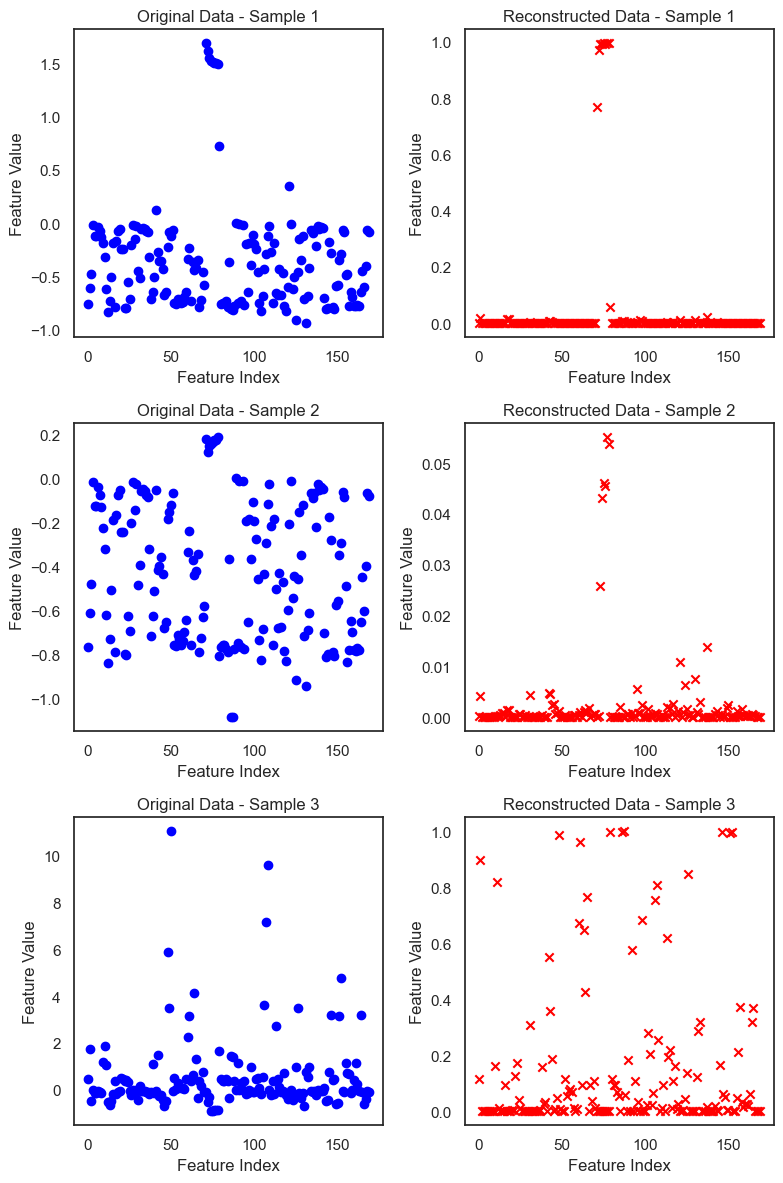

In [135]:
X_test_array = X_test_normalized.to_numpy()

# Plotting
n_samples = min(3, X_test_array.shape[0])  # Choose the number of samples to visualize (e.g., 5)

plt.figure(figsize=(8, 4 * n_samples))

for i in range(n_samples):
    # Original Data
    plt.subplot(n_samples, 2, 2 * i + 1)
    plt.scatter(range(X_test_array.shape[1]), X_test_array[i], c='blue', marker='o', label='Original')
    plt.title(f'Original Data - Sample {i + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    # Reconstructed Data
    plt.subplot(n_samples, 2, 2 * i + 2)
    plt.scatter(range(X_test_array.shape[1]), reconstructed_instances[i], c='red', marker='x', label='Reconstructed')
    plt.title(f'Reconstructed Data - Sample {i + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

plt.tight_layout()
plt.show()

In [106]:
from tensorflow import keras
input_dim = X_train.shape[1]
encoding_dim = 32

mean_train = np.mean(X_resampled, axis=0)
std_train = np.std(X_resampled, axis=0)

X_train_normalized = (X_resampled - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train

autoencoder = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_normalized, X_train_normalized, epochs=20, batch_size=64, shuffle=True, validation_data=(X_test_normalized, X_test_normalized))
reconstructed_instances = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test_normalized - reconstructed_instances), axis=1)
threshold = np.percentile(mse, 90)
predictions_autoencoder = (mse > threshold).astype(int)

print("Autoencoder Predictions:", predictions_autoencoder)

calcularQualitatResultats(y_test, predictions_autoencoder)

Epoch 1/20
157/157 [==============================] - 1s 5ms/step - loss: 0.8482 - val_loss: 0.6127
Epoch 2/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6859 - val_loss: 0.5966
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6480 - val_loss: 0.5893
Epoch 4/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6285 - val_loss: 0.5842
Epoch 5/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6167 - val_loss: 0.5801
Epoch 6/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6079 - val_loss: 0.5768
Epoch 7/20
157/157 [==============================] - 1s 3ms/step - loss: 0.6012 - val_loss: 0.5739
Epoch 8/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5957 - val_loss: 0.5714
Epoch 9/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5696
Epoch 10/20
157/157 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5680

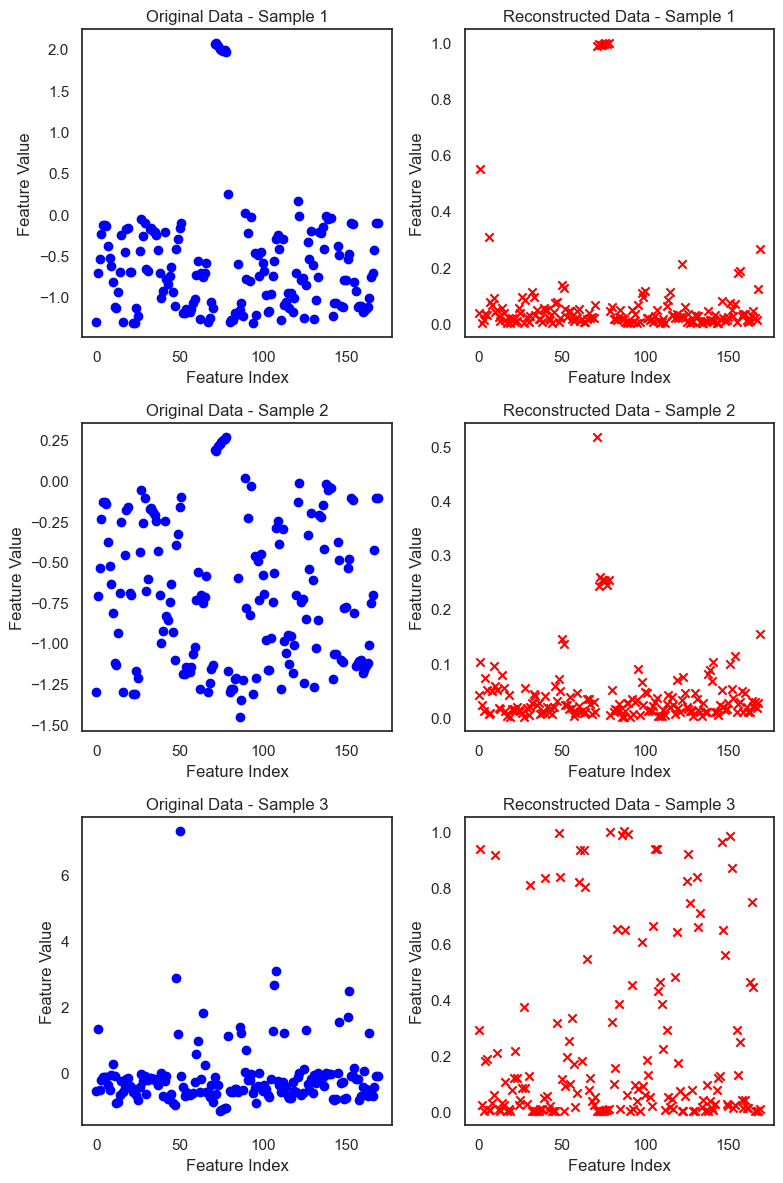

In [107]:
X_test_array = X_test_normalized.to_numpy()

# Plotting
n_samples = min(3, X_test_array.shape[0])  # Choose the number of samples to visualize (e.g., 5)

plt.figure(figsize=(8, 4 * n_samples))

for i in range(n_samples):
    # Original Data
    plt.subplot(n_samples, 2, 2 * i + 1)
    plt.scatter(range(X_test_array.shape[1]), X_test_array[i], c='blue', marker='o', label='Original')
    plt.title(f'Original Data - Sample {i + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    # Reconstructed Data
    plt.subplot(n_samples, 2, 2 * i + 2)
    plt.scatter(range(X_test_array.shape[1]), reconstructed_instances[i], c='red', marker='x', label='Reconstructed')
    plt.title(f'Reconstructed Data - Sample {i + 1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

plt.tight_layout()
plt.show()

## Histogram-based Outlier Score

In [79]:
from pyod.models.hbos import HBOS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

hbos_model = HBOS(contamination=0.06)  # You can adjust the contamination parameter
calcularValidacioCreuada(hbos_model, X[top_correlated_variables], y)

C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Scores de validació creuada (recall): [0.85992218 0.80079681 0.81422925 0.81640625 0.84078212]
Mitjana dels scores (recall): 0.8264273227308433
Scores de validació creuada (f1): [0.35964199 0.35989257 0.35982533 0.36828194 0.458492  ]
Mitjana dels scores (f1): 0.3812267647239174


C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     15625
           1       0.27      0.67      0.38       375

    accuracy                           0.95     16000
   macro avg       0.63      0.82      0.68     16000
weighted avg       0.97      0.95      0.96     16000

[[  253   122]
 [  696 14929]]
Precision: 0.267
Accuracy: 0.949
Recall: 0.675
F1: 0.382


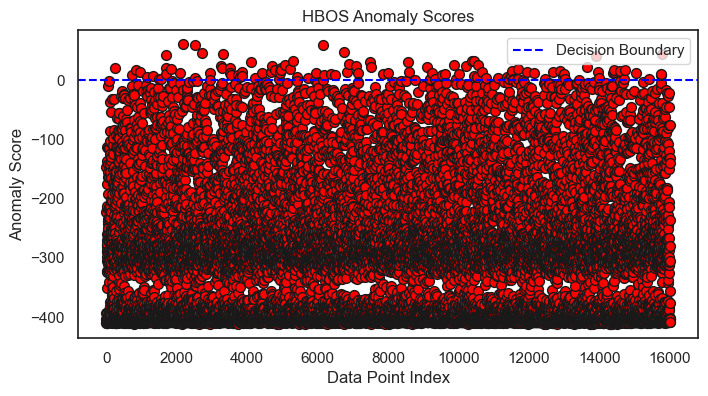

In [364]:
hbos_model_tmp = HBOS(contamination=0.06)  # You can adjust the contamination parameter
hbos_model_tmp.fit(X_train)
predictions_hbos = hbos_model_tmp.predict(X_test)
classification_rep = classification_report(y_test, predictions_hbos)
print("Classification Report:")
print(classification_rep)
calcularQualitatResultats(y_test, predictions_hbos)
anomaly_scores = hbos_model.decision_function(X_test)
plt.figure(figsize=(8, 4))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c='red', marker='o', edgecolors='k', s=50)
plt.axhline(y=0, color='blue', linestyle='--', label='Decision Boundary')
plt.title('HBOS Anomaly Scores')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()

In [80]:
from pyod.models.hbos import HBOS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

hbos_model_resampling = HBOS(contamination=0.5)  # You can adjust the contamination parameter
calcularValidacioCreuada(hbos_model_resampling, X_res[top_correlated_variables], y_res)

Scores de validació creuada (recall): [0.         0.         0.78690909 0.93745455 0.92072727]
Mitjana dels scores (recall): 0.5290181818181818
Scores de validació creuada (f1): [0.         0.         0.78805535 0.96771772 0.95872775]
Mitjana dels scores (f1): 0.5429001651194381


C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
C:\Users\Ramon\anaconda3\Lib\site-packages\pyod\models\base.py:430: UserWarning: y should not be pre

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.56      0.71     15625
           1       0.03      0.51      0.05       375

    accuracy                           0.56     16000
   macro avg       0.50      0.53      0.38     16000
weighted avg       0.96      0.56      0.70     16000

[[ 191  184]
 [6899 8726]]
Precision: 0.027
Accuracy: 0.557
Recall: 0.509
F1: 0.051


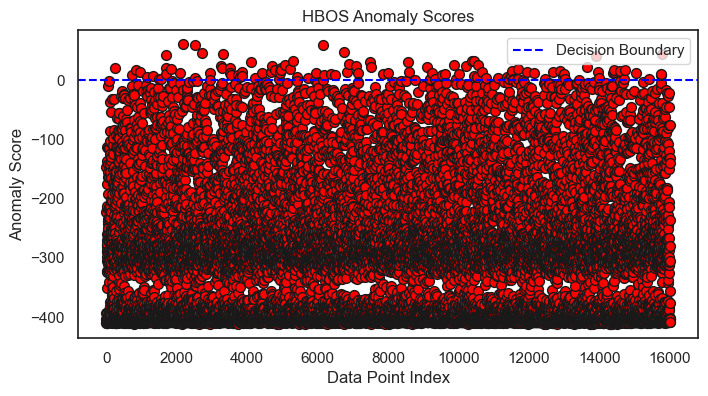

In [365]:
hbos_model_tmp = HBOS(contamination=0.5)  # You can adjust the contamination parameter
hbos_model_tmp.fit(X_resampled)
predictions_hbos = hbos_model_tmp.predict(X_test)
classification_rep = classification_report(y_test, predictions_hbos)
print("Classification Report:")
print(classification_rep)
calcularQualitatResultats(y_test, predictions_hbos)
anomaly_scores = hbos_model.decision_function(X_test)
plt.figure(figsize=(8, 4))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c='red', marker='o', edgecolors='k', s=50)
plt.axhline(y=0, color='blue', linestyle='--', label='Decision Boundary')
plt.title('HBOS Anomaly Scores')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.show()